In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mars-project/Audio_Song_Actors_01-24/Actor_02/03-02-05-02-01-01-02.wav
/kaggle/input/mars-project/Audio_Song_Actors_01-24/Actor_02/03-02-06-01-02-02-02.wav
/kaggle/input/mars-project/Audio_Song_Actors_01-24/Actor_02/03-02-03-02-01-02-02.wav
/kaggle/input/mars-project/Audio_Song_Actors_01-24/Actor_02/03-02-03-01-02-02-02.wav
/kaggle/input/mars-project/Audio_Song_Actors_01-24/Actor_02/03-02-04-02-01-01-02.wav
/kaggle/input/mars-project/Audio_Song_Actors_01-24/Actor_02/03-02-01-01-01-01-02.wav
/kaggle/input/mars-project/Audio_Song_Actors_01-24/Actor_02/03-02-01-01-02-02-02.wav
/kaggle/input/mars-project/Audio_Song_Actors_01-24/Actor_02/03-02-04-01-01-01-02.wav
/kaggle/input/mars-project/Audio_Song_Actors_01-24/Actor_02/03-02-04-02-02-02-02.wav
/kaggle/input/mars-project/Audio_Song_Actors_01-24/Actor_02/03-02-06-02-01-01-02.wav
/kaggle/input/mars-project/Audio_Song_Actors_01-24/Actor_02/03-02-06-02-02-02-02.wav
/kaggle/input/mars-project/Audio_Song_Actors_01-24/Actor_02/03-02

In [5]:
import os
import pandas as pd

# Define path
folder_path = '/kaggle/input/mars-project/Audio_Speech_Actors_01-24'

# Collect file paths and metadata
data = []

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.wav'):
            full_path = os.path.join(root, file)
            parts = file.split('-')
            if len(parts) == 7:
                emotion = int(parts[2])
                actor = int(parts[-1].split('.')[0])
                data.append({
                    'path': full_path,
                    'emotion': emotion,
                    'actor': actor
                })

# Convert to DataFrame
df = pd.DataFrame(data)

# Show first few rows
df.head()


,path,emotion,actor
0,/kaggle/input/mars-project/Audio_Speech_Actors...,8,2
1,/kaggle/input/mars-project/Audio_Speech_Actors...,1,2
2,/kaggle/input/mars-project/Audio_Speech_Actors...,7,2
3,/kaggle/input/mars-project/Audio_Speech_Actors...,7,2
4,/kaggle/input/mars-project/Audio_Speech_Actors...,1,2


In [6]:
import os
import pandas as pd


emotions = {
    1: 'calm', 2: 'happy', 3: 'sad',
    4: 'angry', 5: 'fearful', 6: 'disgust'
}

In [7]:
def extract_data_from_name(fname):
    parts = fname.split('.')[0].split('-')
    return {
        'filename': fname,
        'modality': int(parts[0]),
        'channel': int(parts[1]),  # 1 = speech, 2 = song
        'emotion_id': int(parts[2]),
        'emotion': emotions.get(int(parts[2]), 'unknown'),
        'intensity': int(parts[3]),
        'statement': int(parts[4]),
        'repeat': int(parts[5]),
        'actor': int(parts[6]),
        'gender': 'male' if int(parts[6]) % 2 != 0 else 'female'
    }

In [11]:
def create_dataframe(link):
    data = []
    for root, dirs, files in os.walk(link):
        for file in files:
            if file.endswith(".wav"):
                metadata = extract_data_from_name(file)
                metadata['path'] = os.path.join(root, file)
                data.append(metadata)
    return pd.DataFrame(data)


dataset_path = "/kaggle/input/mars-project"
df = create_dataframe(dataset_path)

In [12]:
df.shape

(2452, 11)

In [13]:
df.sample(5)

,filename,modality,channel,emotion_id,emotion,intensity,statement,repeat,actor,gender,path
452,03-02-03-01-01-01-06.wav,3,2,3,sad,1,1,1,6,female,/kaggle/input/mars-project/Audio_Song_Actors_0...
216,03-02-04-01-02-02-21.wav,3,2,4,angry,1,2,2,21,male,/kaggle/input/mars-project/Audio_Song_Actors_0...
1782,03-01-08-02-01-02-23.wav,3,1,8,unknown,2,1,2,23,male,/kaggle/input/mars-project/Audio_Speech_Actors...
938,03-02-02-02-01-01-13.wav,3,2,2,happy,2,1,1,13,male,/kaggle/input/mars-project/Audio_Song_Actors_0...
2278,03-01-03-02-02-01-13.wav,3,1,3,sad,2,2,1,13,male,/kaggle/input/mars-project/Audio_Speech_Actors...


In [14]:
df.isnull().sum()

filename      0
modality      0
channel       0
emotion_id    0
emotion       0
intensity     0
statement     0
repeat        0
actor         0
gender        0
path          0
dtype: int64

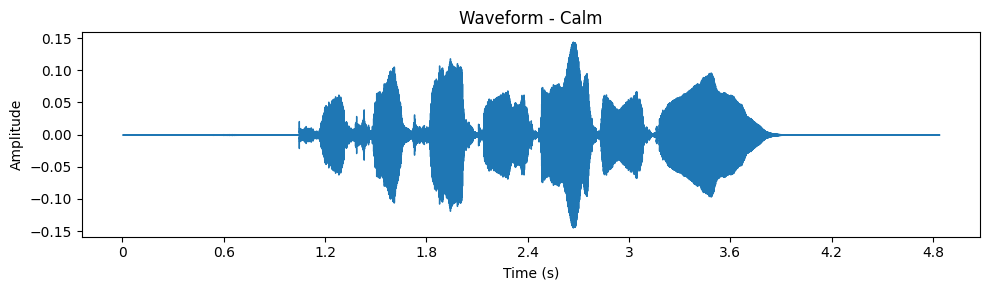

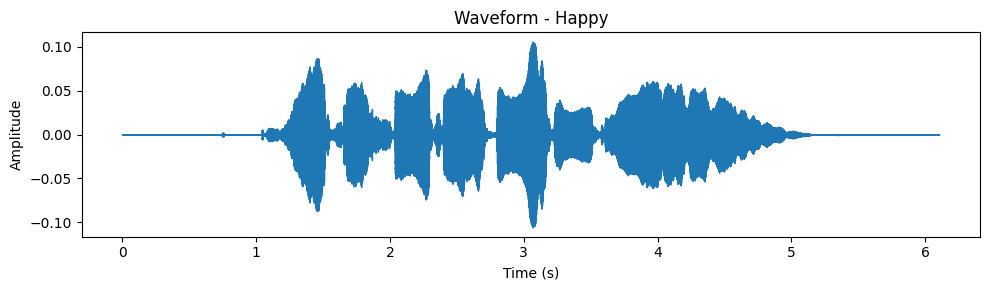

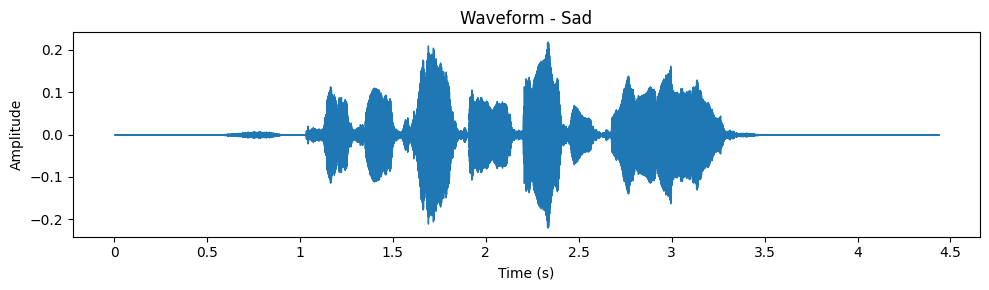

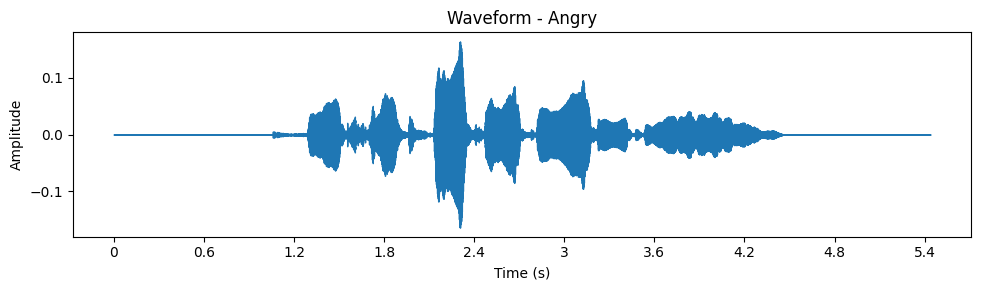

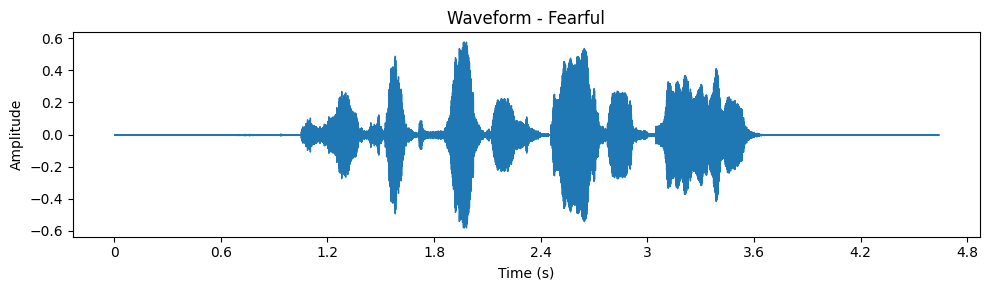

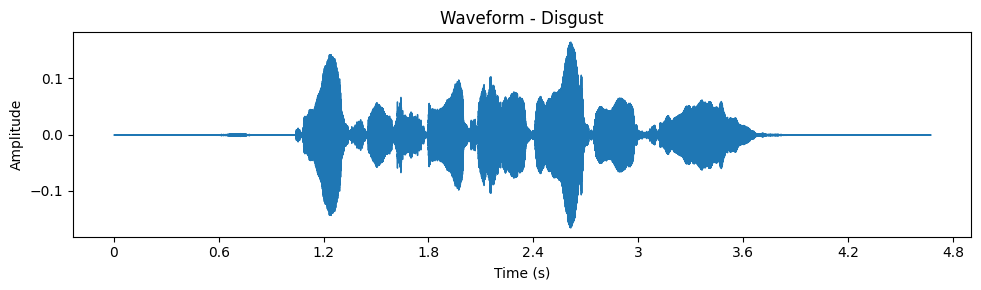

In [15]:
import librosa
import matplotlib.pyplot as plt 

for emotion in emotions.values():
    emotion_df = df[df['emotion'] == emotion]

    if not emotion_df.empty:
            row = emotion_df.iloc[0]  
            y, sr = librosa.load(row['path'], sr=None)

            plt.figure(figsize=(10, 3))
            librosa.display.waveshow(y, sr=sr)
            plt.title(f'Waveform - {emotion.capitalize()}')
            plt.xlabel('Time (s)')
            plt.ylabel('Amplitude')
            plt.tight_layout()
            plt.show()

In [16]:
df[['filename', 'emotion', 'path']].head()

,filename,emotion,path
0,03-02-05-02-01-01-02.wav,fearful,/kaggle/input/mars-project/Audio_Song_Actors_0...
1,03-02-06-01-02-02-02.wav,disgust,/kaggle/input/mars-project/Audio_Song_Actors_0...
2,03-02-03-02-01-02-02.wav,sad,/kaggle/input/mars-project/Audio_Song_Actors_0...
3,03-02-03-01-02-02-02.wav,sad,/kaggle/input/mars-project/Audio_Song_Actors_0...
4,03-02-04-02-01-01-02.wav,angry,/kaggle/input/mars-project/Audio_Song_Actors_0...


In [17]:
import librosa
import numpy as np

#Applying mfcc - audio waveforn --> fourier transform --> mel scaling --> logarithm --> inverse fourier transform(Cepstrum, Quefrency) 
def extract_mfcc_features(wav_path, n_mfcc=40):
        y, sr = librosa.load(wav_path, sr=None)  
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc) 
        mfcc_mean = np.mean(mfcc.T, axis=0) 
        return mfcc_mean

In [18]:
df['mfcc'] = df['path'].apply(extract_mfcc_features)

In [19]:
import numpy as np
X = np.stack(df['mfcc'].values)

In [20]:
X.shape

(2452, 40)

In [21]:
print(df[['emotion', 'mfcc']].sample(35))

      emotion                                               mfcc
337     happy  [-623.7818, 46.187492, -32.805664, 9.1859045, ...
1137  unknown  [-658.2851, 69.19514, 1.9624767, 14.425354, 2....
740      calm  [-635.40393, 90.59071, -11.386645, 20.841825, ...
2041    happy  [-631.78436, 74.591446, 9.421775, 15.84711, 1....
1654  unknown  [-718.33795, 83.775734, -10.53209, 14.579582, ...
63    fearful  [-392.7138, 75.6886, -11.968445, 2.6520178, 2....
2410  unknown  [-544.6024, 59.524452, -4.9843574, 14.89636, -...
2214  fearful  [-371.46576, 70.171585, -23.333237, 11.865147,...
392     angry  [-654.4278, 54.05344, -7.6363077, 8.627235, -5...
2007  unknown  [-697.3357, 94.45921, 2.9619403, 30.520607, 6....
881   fearful  [-420.1965, 93.47658, -36.22115, 17.446507, 4....
461   fearful  [-443.1497, 61.83617, -49.99746, -0.21773852, ...
575     happy  [-618.65485, 66.5083, -22.021132, 4.1380615, -...
927   fearful  [-522.77765, 69.44122, -11.061456, 13.474098, ...
283     angry  [-600.1914

In [22]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = df['emotion'].values
y_encoded = le.fit_transform(y)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [34]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
import numpy as np


xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',         
    num_class=6,
    n_estimators=400,
    max_depth=6,
    learning_rate=0.07,
    subsample=0.85,                     
    colsample_bytree=0.8,               
    reg_alpha=0.5,                      
    reg_lambda=1.0,                     
    gamma=0.1,                          
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    verbosity=1                         
)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)




In [35]:
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

y_test1 = le.inverse_transform(y_test)
y_pred1 = le.inverse_transform(y_pred)

 Accuracy: 0.786150712830957

 Classification Report:



,precision,recall,f1-score,support
angry,0.81,0.64,0.71,80.00
calm,0.90,0.73,0.81,37.00
disgust,0.75,0.74,0.75,74.00
fearful,0.79,0.85,0.82,67.00
happy,0.72,0.95,0.82,65.00
sad,0.87,0.73,0.79,79.00
unknown,0.76,0.85,0.80,89.00
accuracy,0.79,0.79,0.79,0.79
macro avg,0.80,0.79,0.79,491.00
weighted avg,0.79,0.79,0.78,491.00


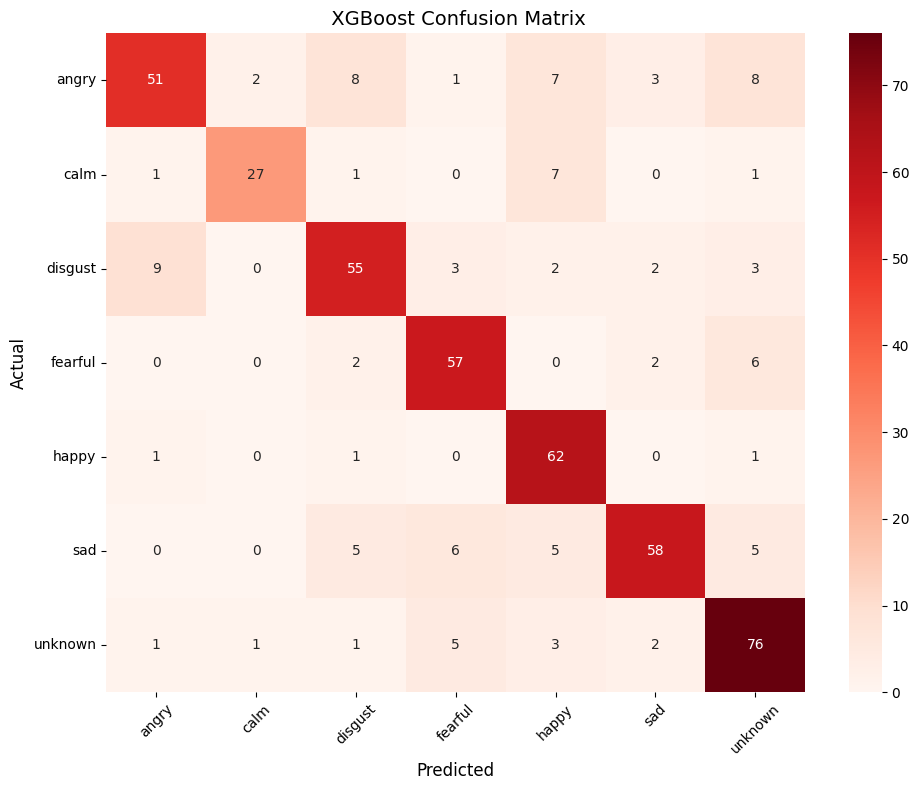

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


labels = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'sad', 'unknown']

acc = accuracy_score(y_test1, y_pred1)
print(f" Accuracy: {acc:.15f}")

report = classification_report(y_test1, y_pred1, target_names=labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\n Classification Report:\n")
display(report_df.round(2))  # For cleaner formatting

cm = confusion_matrix(y_test1, y_pred1)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)
plt.title(" XGBoost Confusion Matrix", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [38]:
import pickle


with open("model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)


with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)